In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: catalog_error_comparison.py
"""
Created on Sun May 27 15:28:04 2018

@author: Neo(liuniu@smail.nju.edu.cn)

Plot the meadian formal error of various catalogs.

"""

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
import numpy as np

# My modules
from my_progs.catalog.read_icrf import read_icrf1, read_icrf2, read_icrf3
from my_progs.catalog.read_gaia import read_dr1_qso, read_dr2_iers


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                "%" % int(height), fontsize=8,
                ha="center", va="bottom")

In [4]:
# ICRF1 catalog
icrf1 = read_icrf1()

# Fill the masked column
# ra_err = icrf1["ra_err"].filled()
# dec_err = icrf1["dec_err"].filled()
# pos_err = icrf1["pos_err"].filled()
ra_err = icrf1["ra_err"]
dec_err = icrf1["dec_err"]
pos_err = icrf1["pos_err"]

# Median error
me_ra_i1 = np.median(ra_err[ra_err != 0])
me_dec_i1 = np.median(dec_err[dec_err != 0])
me_pos_i1 = np.median(pos_err[pos_err != 0])

# ICRF2 catalog
icrf2 = read_icrf2()

# Median error
me_ra_i2 = np.median(icrf2["ra_err"])
me_dec_i2 = np.median(icrf2["dec_err"])
me_pos_i2 = np.median(icrf2["pos_err"])

# ICRF3 S/X catalog
icrf3sx = read_icrf3(wv="sx")

# Median error
me_ra_i3sx = np.median(icrf3sx["ra_err"])
me_dec_i3sx = np.median(icrf3sx["dec_err"])
me_pos_i3sx = np.median(icrf3sx["pos_err"])

# ICRF3 K catalog
icrf3k = read_icrf3(wv="k")

# Median error
me_ra_i3k = np.median(icrf3k["ra_err"])
me_dec_i3k = np.median(icrf3k["dec_err"])
me_pos_i3k = np.median(icrf3k["pos_err"])

# ICRF3 X/Ka catalog
icrf3xka = read_icrf3(wv="xka")

# Median error
me_ra_i3xka = np.median(icrf3xka["ra_err"])
me_dec_i3xka = np.median(icrf3xka["dec_err"])
me_pos_i3xka = np.median(icrf3xka["pos_err"])

# Gaia DR1 Quasar auxiliary solution
gaiadr1 = read_dr1_qso()

# Median error
me_ra_g1 = np.median(gaiadr1["ra_err"])
me_dec_g1 = np.median(gaiadr1["dec_err"])
me_pos_g1 = np.median(gaiadr1["pos_err"])

# Gaia DR2 aux_iers catalog
gaiadr2 = read_dr2_iers()

# Median error
me_ra_g2 = np.median(gaiadr2["ra_err"])
me_dec_g2 = np.median(gaiadr2["dec_err"])
me_pos_g2 = np.median(gaiadr2["pos_err"])

# Gaia DR2 bright sample
gdr2bgt = gaiadr2[gaiadr2["phot_g_mean_mag"]<18.7].filled()

# Median error
me_ra_g2bgt = np.median(gdr2bgt["ra_err"])
me_dec_g2bgt = np.median(gdr2bgt["dec_err"])
me_pos_g2bgt = np.median(gdr2bgt["pos_err"])

/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


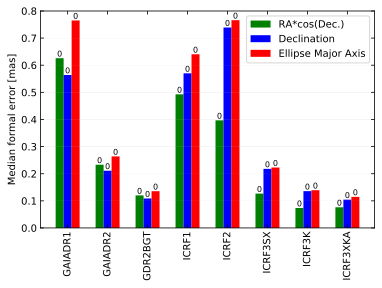

In [5]:
# Plot for median error
fig, ax = plt.subplots()

barwidth = 0.2

# data
catalogs = ["GAIADR1", "GAIADR2", "GDR2BGT", "ICRF1",
            "ICRF2", "ICRF3SX", "ICRF3K", "ICRF3XKA"]
ra_pos = np.arange(len(catalogs)) - barwidth
dec_pos = np.arange(len(catalogs))
max_pos = np.arange(len(catalogs)) + barwidth

me_ra = np.array([me_ra_g1, me_ra_g2, me_ra_g2bgt, me_ra_i1,
                  me_ra_i2, me_ra_i3sx, me_ra_i3k, me_ra_i3xka])
me_dec = np.array([me_dec_g1, me_dec_g2, me_dec_g2bgt, me_dec_i1, me_dec_i2,
                   me_dec_i3sx, me_dec_i3k, me_dec_i3xka])
me_pos = np.array([me_pos_g1, me_pos_g2, me_pos_g2bgt, me_pos_i1, me_pos_i2,
                   me_pos_i3sx, me_pos_i3k, me_pos_i3xka])

ra = ax.bar(ra_pos, me_ra,  width=barwidth, align='center',
       color='g', ecolor='black', label="RA*cos(Dec.)")
dec = ax.bar(dec_pos, me_dec,  width=barwidth, align='center',
       color='b', ecolor='black', label="Declination")
eema = ax.bar(max_pos, me_pos,  width=barwidth, align='center',
       color='r', ecolor='black', label="Ellipse Major Axis")


autolabel(ra)
autolabel(dec)
autolabel(eema)

ax.set_xticks(dec_pos)
ax.set_xticklabels(catalogs, rotation="vertical")
ax.set_ylim([0, 0.8])
ax.set_ylabel('Median formal error [mas]')
ax.yaxis.grid()  # horizontal lines
ax.legend()

In [ ]:
from astropy.io import ascii
from astropy.table import Table

med = Table([catalogs, me_ra * 1e3, me_dec * 1e3, me_pos * 1e3],
            names=[
                "Catalog", "$\sigma_{\\alpha^*}$", "$\sigma_\delta$",
                "$\sigma_{\\rm pos,max}$"
            ])



med.write("../logs/median-error.log",
          format="latex",
          latexdict=ascii.latex.latexdicts["AA"],
          formats={
              "$\sigma_{\\alpha^*}$": "%.0f",
              "$\sigma_\delta$": "%.0f",
              "$\sigma_{\\rm pos,max}$": "%.0f"
          })